In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data=pd.read_csv('gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.shape

(2290, 6)

In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
correlation=data.corr()

<AxesSubplot:>

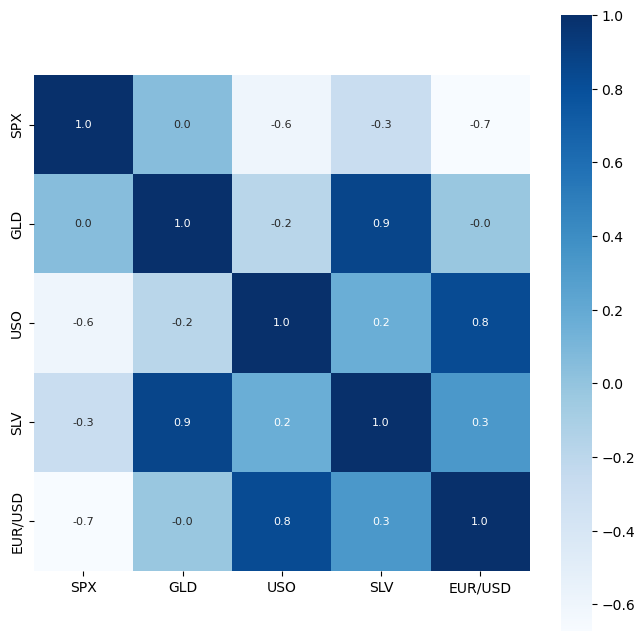

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

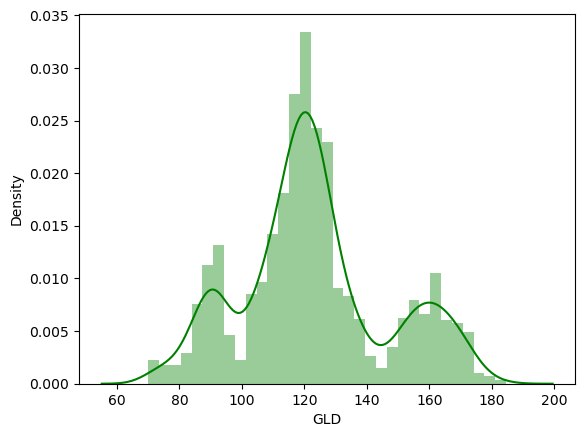

In [12]:
sns.distplot(data['GLD'],color='green')

In [13]:
x=data.drop(['GLD','Date'],axis=1)
y=data['GLD']

In [14]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
model=RandomForestRegressor(n_estimators=100)

In [18]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
predicted=model.predict(x_test)

In [28]:
print(predicted)

[168.5352998   82.04559985 116.28510023 127.64900051 120.81340113
 154.65739776 150.29239863 126.25130039 117.61969859 126.08400022
 116.96420101 170.9018005  141.96519856 168.02019866 115.13220017
 117.95380062 139.00250336 170.74060198 159.00040306 161.83059868
 154.83469961 125.3240005  175.8528001  157.18750337 125.03800046
  93.67049961  78.13510031 120.73130029 119.12089943 167.54209946
  88.32960036 125.17250014  91.1752007  117.66650007 121.08639911
 136.5745014  115.68530132 115.06530115 148.76980001 106.93700106
 104.32810245  87.43069828 126.41360048 118.10910006 153.6493982
 119.49890007 108.42770001 108.01499856  93.18410052 127.15229767
  74.7565004  113.55509947 121.38389999 111.0899995  118.81619882
 120.77159956 159.08289926 169.96010092 146.79829666  85.7657986
  94.42740027  86.81899885  90.38880011 118.89560089 126.44440078
 127.68249973 170.4546003  122.23749923 117.63579866  98.3182003
 168.65790176 142.92869728 131.89700213 121.21460235 120.86439936
 119.89360045

In [29]:
error_score=metrics.r2_score(y_test,predict)
print("R squared error :",error_score)

R squared error : 0.9889702620419831


In [30]:
y_test=list(y_test)

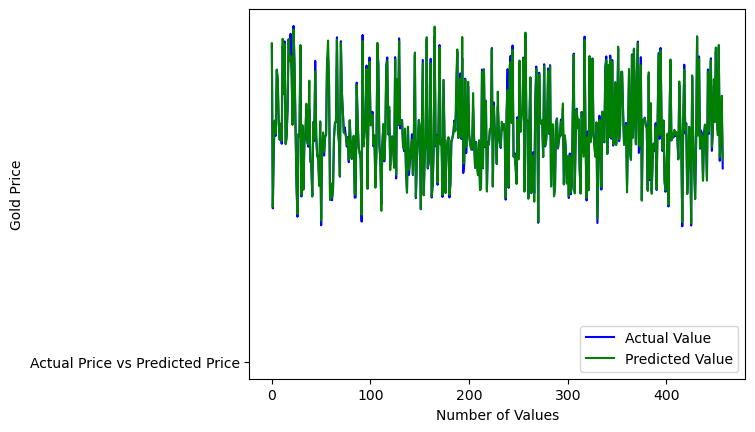

In [31]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(predict,color='green',label='Predicted Value')
plt.plot('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()